# DIABETES PREDICTION - KAGGLE
Dataset - https://www.kaggle.com/johndasilva/diabetes

### Load the dataset and the necesarry liabraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('kaggle_diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


### Explore the Data Set

In [4]:
df.shape

(2000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

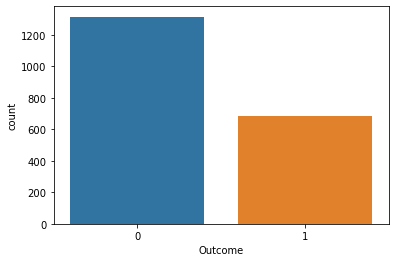

In [8]:
sns.countplot('Outcome', data=df)

### Feature Enginnering and Feature Selection

In [9]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df=df.fillna(df.mean())

### Model Development

#### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X=df.drop('Outcome', axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y)

#### Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

#### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train).score(X_test, y_test)

0.8225

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.815

#### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)
dt.fit(X_train, y_train).score(X_test, y_test)

0.8225

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)
dt.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.815

#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
rf=LogisticRegression(C=0.1)
dt.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.815

#### Support Vector Machine

In [19]:
from sklearn.svm import SVC
rf=SVC()
rf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.825

#### k-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

scores=[]
for k in range(1, 21):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores.append((k, knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))

In [21]:
sorted(scores, key = lambda x: x[1], reverse=True)[0]

(1, 0.96)

##### Thus we see that knn is the best performing model for our case and we will be using the same for the prediction of diabetes.

In [22]:
from sklearn.model_selection import cross_val_score
avg_score=cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train_scaled, y_train, cv=5)
print(f'Average score of KNN = {avg_score.mean()}%')

Average score of KNN = 0.94625%


In [23]:
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
y_pred=classifier.predict(X_test)
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[259,   4],
       [  5, 132]], dtype=int64)

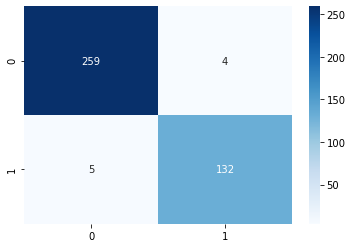

In [26]:
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')

In [27]:
score=accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy={score*100}%")

Test Set Accuracy=97.75%


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.97      0.96      0.97       137

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400



## Predict Diabetes

In [29]:
def diabetes(preg, glucose, bp, skinThickness, insulin, BMI, DPF, age):
    predictions={0:'You dont have diabetes', 1:'You have diabetes'}
    prediction=classifier.predict([[preg, glucose, bp, skinThickness, insulin, BMI, DPF, age]])[0]
    return predictions[prediction]

In [30]:
print(diabetes(0, 84, 82, 31, 125, 38.2, 0.233, 23))
print(diabetes(2, 138, 62, 35, 0, 33.6, 0.127, 47))
print(diabetes(8, 179, 72, 42, 130, 32.7, 0.719, 36))

You dont have diabetes
You dont have diabetes
You have diabetes
